***Done by CED19I049***

---


<p><b>Dataset Link</b> : https://archive.ics.uci.edu/ml/datasets/Movie</p>
<p><b>Dataset Info : </b>The data is stored in relational form across several files. The central file (MAIN) is a list of movies, each with a unique identifier. These identifiers may change in successive versions. The actors (CAST) for those movies are listed with their roles in a distinct file. More information about individual actors (ACTORS) is in a third file. All directors in MAIN are listed in a fourth file (PEOPLE), with a number of important producers, writers, and cinematographers. A fifth file (REMAKES) links movies that were copied to a substantial extent from each other. The sixth file (STUDIOS) provides some information about studios shown in MAIN.</p>
<p><b>Subset chosen : </b>I took <i style= color:blue;>actors.html</i> as my dataset from the data folder.</p>


In [97]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import seaborn as sns
import datetime

In [98]:
# Reading the data from the HTML file
actors_table_MN = pd.read_html('https://archive.ics.uci.edu/ml/machine-learning-databases/movies-mld/data/actors.html')

* The dataset is of HTML type. So first using read_html() all the html content is loaded into actors_table_MN.

In [99]:
print(f'Total tables: {len(actors_table_MN)}')

Total tables: 27


* We can see there are 27 HTML tables in actors.html, So Im combing all HTML tables into a single table

In [100]:
# Merging all HTML tables
actors_df = pd.concat(actors_table_MN)

In [101]:
# resetting the index of new dataframe
actors_df = actors_df.reset_index(drop=True)

In [102]:
# dimensions of our dataset
actors_df.shape

(6643, 25)

In [103]:
# checking the resultant dataframe
actors_df

,stage,dow,birth,giv,gen,dob,dod,type,orig,pict,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Willie Aames,NaN,Aames,William,M,1960,199x,RU:,\Am,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bud Abbott,1939-1956,Abbott,William,M,1895,1974,R:straight,comedian,\Am,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Diahnne Abbott,1976-1982,NaN,NaN,F,[1][23],199x,R:sexy,\Am,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,George Abbott,1928-1958,Abbott,George,M,1887,199x,"R:playwright, producer",\Am,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Abbott,1937-1975,Abbott,John,M,1905,199x,"R:staring eyes, eccentric parts",\Br,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,David Zucker,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6639,Jerry Zucker,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6640,Daphne Zuniga,NaN,NaN,NaN,F,[1],199x,RU:,\Un,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6641,Frantisek Zvarik,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr>
<h3>Data Cleaning</h3><br>
* We can see there are many Unamed Columns containing Nan values,
So Im dropping these columns as part of data cleaning 


In [104]:
actors_df = actors_df.drop(actors_df.columns[actors_df.columns.str.contains('Unnamed', case=False)], axis=1)

In [105]:
actors_df

,stage,dow,birth,giv,gen,dob,dod,type,orig,pict,notes,|
0,Willie Aames,NaN,Aames,William,M,1960,199x,RU:,\Am,NaN,NaN,|
1,Bud Abbott,1939-1956,Abbott,William,M,1895,1974,R:straight,comedian,\Am,NaN,Ww(Lou Costello) St(Universal)
2,Diahnne Abbott,1976-1982,NaN,NaN,F,[1][23],199x,R:sexy,\Am,NaN,Cit(2) Mt(Robert deNiro;),|
3,George Abbott,1928-1958,Abbott,George,M,1887,199x,"R:playwright, producer",\Am,NaN,NaN,|
4,John Abbott,1937-1975,Abbott,John,M,1905,199x,"R:staring eyes, eccentric parts",\Br,NaN,NaN,|
...,...,...,...,...,...,...,...,...,...,...,...,...
6638,David Zucker,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,Cit(1),|
6639,Jerry Zucker,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,Cit(1) Also(D),|
6640,Daphne Zuniga,NaN,NaN,NaN,F,[1],199x,RU:,\Un,NaN,Cit(0),|
6641,Frantisek Zvarik,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,Cit(1),|


<p></p>



*   Irrelevant Data
   



In [106]:
# Check for irrelevant data and drop column '|'
if "|" in actors_df.columns:
    actors_df.drop(columns=["|"], inplace=True)#

In [107]:
actors_df

,stage,dow,birth,giv,gen,dob,dod,type,orig,pict,notes
0,Willie Aames,NaN,Aames,William,M,1960,199x,RU:,\Am,NaN,NaN
1,Bud Abbott,1939-1956,Abbott,William,M,1895,1974,R:straight,comedian,\Am,NaN
2,Diahnne Abbott,1976-1982,NaN,NaN,F,[1][23],199x,R:sexy,\Am,NaN,Cit(2) Mt(Robert deNiro;)
3,George Abbott,1928-1958,Abbott,George,M,1887,199x,"R:playwright, producer",\Am,NaN,NaN
4,John Abbott,1937-1975,Abbott,John,M,1905,199x,"R:staring eyes, eccentric parts",\Br,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6638,David Zucker,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,Cit(1)
6639,Jerry Zucker,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,Cit(1) Also(D)
6640,Daphne Zuniga,NaN,NaN,NaN,F,[1],199x,RU:,\Un,NaN,Cit(0)
6641,Frantisek Zvarik,NaN,NaN,NaN,M,[1],199x,RU:,\Un,NaN,Cit(1)




*   Missing data



In [108]:
# Check for missing data
print("Missing data:\n", actors_df.isna().sum())

Missing data:
 stage       2
dow      1960
birth    2018
giv      2022
gen       148
dob       360
dod       101
type        8
orig      109
pict     5917
notes    3474
dtype: int64


* Columns with high missing data like "dow" and "birth" cant be dropped as it leads to huge data loss.<br>
* Columns like birth_year(dob) and death_year(dod) can be fixed by data transformation.<br>
* It is better to leave few columns unchanged.




*   Incosistent Data



In [109]:
# Check for inconsistent data
print(actors_df['gen'].value_counts())

M           3950
F           2487
G             22
A              8
gen            4
[6]            2
Krekor         2
1945           1
1906           1
N              1
Martin         1
\M             1
Tatania        1
Anna           1
DM             1
Helen          1
Crichton       1
|              1
Ff             1
Mm             1
M,F            1
[1]            1
1930           1
Ruben M        1
Daniel         1
1903           1
Woolrich       1
Name: gen, dtype: int64


* we can see "gender" column has values other than "M" or "F", lets fix this by creating new value "Unknown" and replace values other than "M" and "F" with "Unknown".

In [110]:
# Replace values other than "M" and "F" with "Unknown"
actors_df.loc[~actors_df["gen"].isin(["M", "F"]), "gen"] = "Unknown"

In [111]:
print(actors_df['gen'].value_counts())

M          3950
F          2487
Unknown     206
Name: gen, dtype: int64






*   Duplicate records





In [112]:
# Check for duplicate rows
print(actors_df.duplicated().sum())

4


In [113]:
# drop duplicates
actors_df = actors_df.drop_duplicates()

In [114]:
# checking attribute types
actors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6639 entries, 0 to 6642
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stage   6637 non-null   object
 1   dow     4679 non-null   object
 2   birth   4621 non-null   object
 3   giv     4617 non-null   object
 4   gen     6639 non-null   object
 5   dob     6279 non-null   object
 6   dod     6538 non-null   object
 7   type    6631 non-null   object
 8   orig    6530 non-null   object
 9   pict    723 non-null    object
 10  notes   3166 non-null   object
dtypes: object(11)
memory usage: 622.4+ KB




---



<h3>Data Transformation</h3>

*   We have year of birth and year of death as separate attributes, Using these we can create new coloumn "age" and add it to our dataset
*   From above output we can see "dob" and "dod" are of type object, so first convert them to integer type.
*   Before converting fill the missing values in those attributes with  -1.



In [116]:
df = actors_df.copy()

In [117]:
# Convert 'year of birth' column to numeric type, replacing non-numeric values with NaN
df['dob'] = pd.to_numeric(df['dob'], errors='coerce')

# Print unique values in 'year of birth' column
print(df['dob'].unique())

[1960. 1895.   nan 1887. 1905. 1923. 1898. 1928. 1940. 1920. 1902. 1872.
 1909. 1896. 1945. 1949. 1950. 1915. 1929. 1921. 1931. 1926. 1906. 1938.
 1930. 1912. 1955. 1899. 1903. 1952. 1911. 1932. 1910. 1918. 1936. 1892.
 1908. 1951. 1907. 1901. 1925. 1914. 1939. 1942. 1916. 1894. 1934. 1954.
 1927. 1935. 1883. 1891. 1917. 1993. 1919. 1962. 1889. 1882. 1922. 1947.
 1943. 1948. 1913. 1944. 1941. 1868. 1888. 1900. 1890. 1953. 1884. 1946.
 1904. 1897. 1961. 1885. 1870. 1869. 1924. 1964. 1965. 1963. 1967. 1865.
 1933. 1976. 1879. 1878. 1867. 1958. 1880. 1937. 1974. 1873. 1956. 1844.
 1959. 1893. 1863. 1989. 1886. 1874. 1966. 1876. 1877. 1968. 1866. 1875.
 1861. 1980. 1982. 1970. 1881. 1854. 1957. 1969. 1971. 1994. 1977. 1972.
 1973. 1855. 1856. 1871. 1853. 1975. 1984. 1864. 1847. 1860. 1862. 1858.
 1848. 1985. 1988. 1981.]


In [118]:
# Convert 'year of birth' column to numeric type, replacing non-numeric values with NaN
df['dod'] = pd.to_numeric(df['dod'], errors='coerce')

# Print unique values in 'year of birth' column
print(df['dod'].unique())

[   nan  1974.  1987.  1956.  1982.  1979.  1968.  1985.  1997.  1978.
  1984.  1933.  1973.  1986.  1967.  1955.  1994.  1981.  1971.  1969.
  1937.  1964.  1950.  1970.  1993.  1977.  1992.  1976.  1989.  1990.
  1946.  1963.  1945.  1958.  1983.  1948.  1991.  1949.  1996.  1951.
  1998.  1940.  1959.  1975.  1952.  1960.  1942.  1954.  1962.  1943.
  1965.  1957.  1953.  1932.  1944.  1923.  1934.  1947.  1972.  1999.
  1939.  1980.  1995.  1961.  1966.  1917.  1988.  1930.  1925.  1941.
  1938.  1891.  1935.  1936.    85.  1931.  1926. 11989.  1920.  1929.
  1852.  1928.  1922.  1906.  1903.]


In [119]:
# Calculate the age of the actors from their date of birth and date of death (if available)
df['age'] = df['dod'] - df['dob']

In [120]:
# Drop rows with NaN values in 'age' column
df = df.dropna(subset=['age'])
df

,stage,dow,birth,giv,gen,dob,dod,type,orig,pict,notes,age
1,Bud Abbott,1939-1956,Abbott,William,M,1895.0,1974.0,R:straight,comedian,\Am,NaN,79.0
7,Walter Abel,1935-1974,Abel,Walter,M,1898.0,1987.0,R:harrassed hero,\Am,NaN,NaN,89.0
16,Rodolfo Acosta,1948-1967,Acosta,Rodolfo,M,1920.0,1974.0,R:cold-eyed,\Am-Me,NaN,NaN,54.0
17,Eddie Acuff,1935-1947,Acuff,Eddie,M,1902.0,1956.0,R:supporting comedian,\Am,NaN,NaN,54.0
18,Jean Adair,1922-1947,Adair,Jean,F,1872.0,1956.0,R:sweet aunt,\Am,NaN,NaN,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6605,Gig Young,1940-1978,Barr,Byron,M,1913.0,1978.0,R:pleasantly bemused air,\Am,[34.244],Also(AKA Bryant Fleming) Ww(Hitchcock),65.0
6610,Robert Young,1931-1975,Young,Robert,M,1907.0,1998.0,"R:amiable, dependable, father",\Am,[4.164],Ww(Hitchcock),91.0
6611,Roland Young,1922-1953,Young,Roland,M,1887.0,1953.0,R:whimsical,\Br,[4.1066],NaN,66.0
6620,Blanche Yurka,1936-1957,Yurka,Blanche,F,1887.0,1974.0,R:lcharacter,\Cz,NaN,NaN,87.0


* We successfully cleaned the year and age attributes

---



<h3>Data Visualisation</h3>


*   <h4>Countplot (barplot with counts) for "gender" attribute</h4>



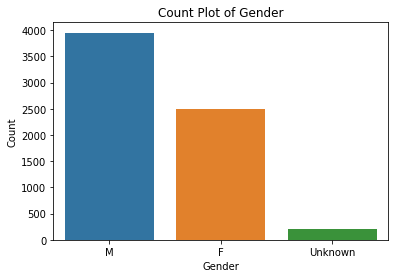

In [133]:
# create a countplot for "gender"
sns.countplot(x="gen", data=actors_df)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count Plot of Gender")
plt.show()


<br>

*   <h4>Visualising "ages" using Box plot (outliers are removed)</h4>




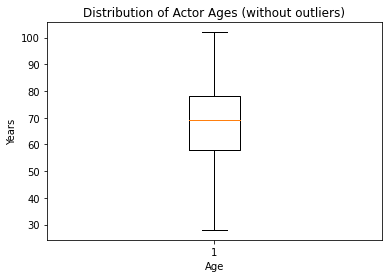

In [134]:
# Calculate IQR and upper/lower bounds
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

# Remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Create a box plot of 'age' column
plt.boxplot(df['age'])

plt.xlabel('Age')
plt.ylabel('Years')
plt.title('Distribution of Actor Ages (without outliers)')
plt.show()



<br>


*   <h4>Histogram showing no .of actors in different age ranges</h4>




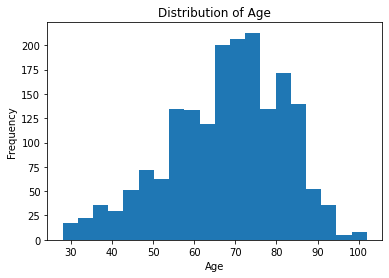

In [135]:
# Create a histogram of age
plt.hist(df["age"], bins=20)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

<br>


*   <h4>Violin plot between "gender" and "age"</h4>



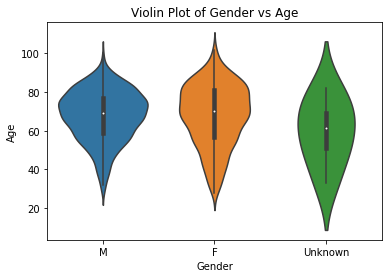

In [87]:
# filter out rows with NaN values in "age" column
actors_df_cleaned = df.dropna(subset=["age"])

# create a violin plot between "gender" and "age"
sns.violinplot(x="gen", y="age", data=actors_df_cleaned)
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Violin Plot of Gender vs Age")
plt.show()


<br>


*   <h4>Visualising no.of years active among Males and Females.</h4>

    To do this first we need to perform data selection by selecting "dow" attribute,<br> It has values in the format 1936-1959(YYYY-YYYY),<br> So extract the start_year and end_year and compute the no. of years acted,<br> then plot avg of years active for each gender.


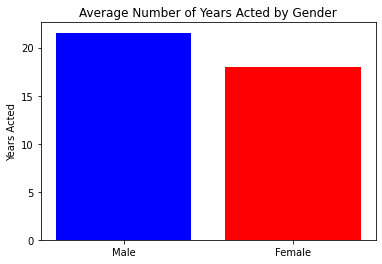

In [163]:
# Convert the years of acting range into start year and end year columns
actors_df[['start_year', 'end_year']] = actors_df['dow'].str.split('-', expand=True)

# Convert the columns to numeric type
actors_df[['start_year', 'end_year']] = actors_df[['start_year', 'end_year']].apply(pd.to_numeric)

# Calculate the number of years of acting career
actors_df['years_of_acting_career'] = actors_df['end_year'] - actors_df['start_year']

# calculate the mean number of years acted for each gender
male_years_acting = actors_df[actors_df['gen'] == 'M']['years_of_acting_career'].mean()
female_years_acting = actors_df[actors_df['gen'] == 'F']['years_of_acting_career'].mean()

# create a bar plot
plt.bar(['Male', 'Female'], [male_years_acting, female_years_acting], color=['blue', 'red'])
plt.title('Average Number of Years Acted by Gender')
plt.ylabel('Years Acted')
plt.show()
